## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('data/ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [4]:
# 모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.530, 206.669)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   ,
        0.   , 0.003, 0.003, 0.   , 0.003, 0.   , 0.   , 0.003, 0.   ,
        0.   , 0.   , 0.003, 0.   , 0.003, 0.005, 0.007, 0.007, 0.   ,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.01 , 0.   , 0.022, 0.003,
        0.02 , 0.025, 0.02 , 0.025, 0.02 , 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.02 , 0.015, 0.033, 0.04 , 0.028, 0.025, 0.018,
        0.022, 0.02 , 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.02 , 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.02 , 0.015, 0.01 , 0.007, 0.   , 0.013, 0.005, 0.003,
        0.013]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.

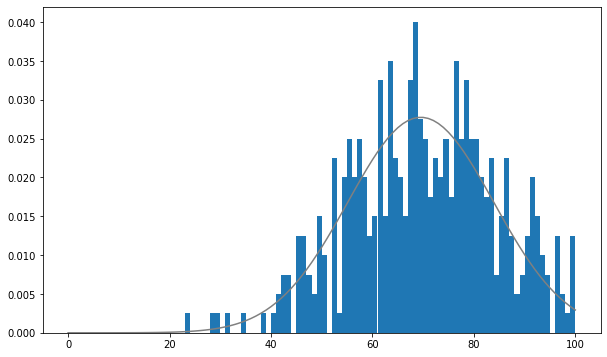

In [6]:
# 모집단이 정규분포를 이룬다고 가정하여 추정 수행
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean,np.sqrt(p_var))

plt.plot(xs,rv.pdf(xs),color='gray')
plt.hist(scores,bins=100,range=(0,100),density=True)

In [7]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [9]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

## 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [12]:
df = pd.read_csv('data/ch4_scores400.csv')
print('모평균:', df.score.mean())

np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

sample_means = np.mean(samples,axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본평균, 분산 :', np.mean(sample_means), np.mean(sample_u_vars))

모평균: 69.53
모분산: 207.18706766917293
표본평균, 분산 : 69.53799999999998 206.67808263157895


In [13]:
# 표본평균의 평균
sample_means = np.mean(samples,axis=1)
np.mean(sample_means)

69.538

In [14]:
# 표본크기를 백만으로 할 때의 표본평균
np.mean(np.random.choice(scores,int(1e6)))

69.543

In [16]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

70.400

In [17]:
np.var(scores)

206.669

#### 과제_0905_1
p266~p291 예제 코드를 풀어보세요

#### 과제_0905_2
- 다음 용어를 예를들어 설명하세요.
  불편성, 일치성, 불편분산<br> 
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.